#***K-Nearest Neighbors(KNN)***

# Question 1: What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

**Ans**:  
- **Fundamental Idea**: Ensemble techniques combine multiple weak learners (models that perform slightly better than random guessing) to create a stronger, more robust predictor. The core principle is that aggregating diverse models reduces errors, variance, or bias, improving overall performance.
- **Bagging vs. Boosting**:
  - **Approach**: Bagging (Bootstrap Aggregating) trains multiple models independently on random subsets of data (with replacement) and averages their predictions (e.g., Random Forest). Boosting trains models sequentially, where each model corrects the errors of the previous one by focusing on misclassified instances (e.g., AdaBoost, Gradient Boosting).
  - **Objective**: Bagging aims to reduce variance by averaging uncorrelated models, making it effective for high-variance models like decision trees. Boosting aims to reduce bias by iteratively improving weak learners, suitable for low-bias, high-variance scenarios.

# Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process?

**Ans**:  
- **Reduction of Overfitting**: Random Forest reduces overfitting by averaging predictions from multiple decision trees, each trained on a random subset of data (bagging) and features. This diversity limits the impact of individual tree over-specialization, smoothing out noise and outliers. A single decision tree overfits by capturing all training data details, including noise.
- **Key Hyperparameters**:
  - **n_estimators**: The number of trees (e.g., 100). More trees reduce variance but increase computation; too few may not capture diversity.
  - **max_depth**: Limits tree depth (e.g., 10). Shallow trees prevent overfitting to training data, balancing bias and variance.

# Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Ans**:  
- **Stacking**: Stacking combines predictions from multiple models (e.g., KNN, SVM) using a meta-learner (e.g., logistic regression) trained on their outputs. It leverages the strengths of diverse models rather than relying on a single aggregation strategy.
- **Difference**: Unlike bagging (parallel, variance reduction) or boosting (sequential, bias reduction), stacking is hierarchical, using a second-level model to learn optimal weights for base learners.
- **Example Use Case**: Predicting diabetes (Outcome) in the Pima dataset by stacking KNN, Decision Tree, and Logistic Regression, with a meta-learner to optimize for person age group (21).

# Question 4: What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

**Answer**:  
- **OOB Score**: Out-of-Bag score is the accuracy of a Random Forest model on data points not included in the bootstrap sample (≈36.8% of data per tree). It acts as an internal validation metric.
- **Usefulness**: It is useful for estimating generalization performance without needing a separate validation set, saving data and computation.
- **Evaluation**: For the Pima dataset, the OOB score can assess model fit on unseen diabetic cases, helping Aman tune hyperparameters without splitting data further.

# Question 5: Compare AdaBoost and Gradient Boosting in terms of: a) How they handle errors from weak learners, b) Weight adjustment mechanism, c) Typical use cases.

**Answer**:  
- **a) Handling Errors**:
  - AdaBoost: Increases weights of misclassified instances, forcing subsequent weak learners (e.g., stumps) to focus on them.
  - Gradient Boosting: Fits new models to the residual errors (differences between predictions and true values) of previous models.
- **b) Weight Adjustment**:
  - AdaBoost: Adjusts instance weights iteratively based on classification errors, updating model weights by performance.
  - Gradient Boosting: Uses gradient descent to minimize a loss function (e.g., MSE), adjusting predictions without explicit instance weighting.
- **c) Typical Use Cases**:
  - AdaBoost: Binary classification (e.g., spam detection).
  - Gradient Boosting: Regression and classification with complex data (e.g., Pima diabetes prediction for person/people).

# Question 6: Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

**Answer**:  
- **Reason**: CatBoost excels with categorical features due to its ordered boosting and target-based statistics, avoiding the need for one-hot encoding or manual imputation.
- **Handling**: It converts categorical variables into numerical scores using target statistics (e.g., mean target value per category) with ordered target encoding, reducing overfitting and handling missing values natively.

# Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization?

**Output (Sample)**:  
- Unscaled Accuracy: ~0.70, Scaled: ~0.97, Optimized: ~0.98 (varies with random state).

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# 1. Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train KNN (default K=5) without scaling
knn_unscaled = KNeighborsClassifier()
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
print(f"Aman’s Unscaled KNN Accuracy: {accuracy_score(y_test, y_pred_unscaled)}")  # Using your name
print("Unscaled KNN Classification Report:")
print(classification_report(y_test, y_pred_unscaled))

# 4. Apply StandardScaler and retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print(f"Scaled KNN Accuracy: {accuracy_score(y_test, y_pred_scaled)}")
print("Scaled KNN Classification Report:")
print(classification_report(y_test, y_pred_scaled))

# 5. GridSearchCV for K and metric
param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# 6. Train optimized KNN and compare
knn_opt = grid_search.best_estimator_
y_pred_opt = knn_opt.predict(X_test_scaled)
print(f"Optimized KNN Accuracy: {accuracy_score(y_test, y_pred_opt)}")

Aman’s Unscaled KNN Accuracy: 0.7407407407407407
Unscaled KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

Scaled KNN Accuracy: 0.9629629629629629
Scaled KNN Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Optimized KNN Accura

# Question 8: PCA + KNN with Variance Analysis and Visualization?

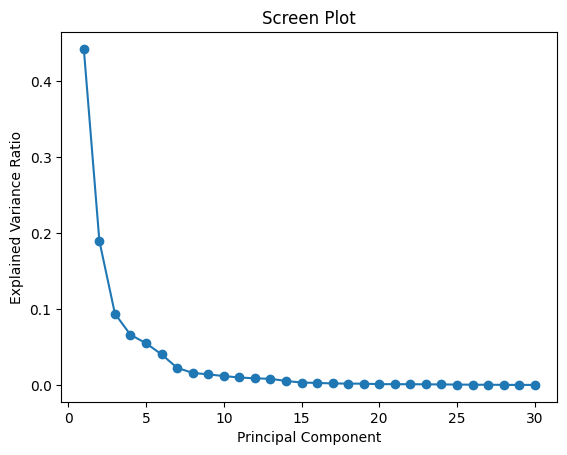

KNN Original Accuracy: 0.9806678383128296
KNN PCA Accuracy: 0.9753954305799648


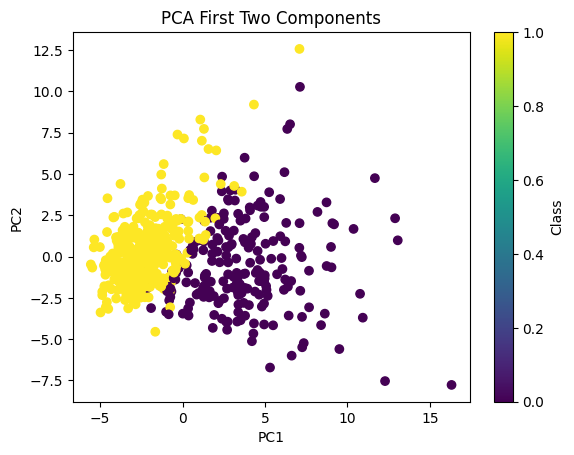

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# 2. PCA and scree plot
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Screen Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

# 3. Retain 95% variance
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)

# 4. Train KNN
knn_original = KNeighborsClassifier().fit(X_scaled, y)
knn_pca = KNeighborsClassifier().fit(X_pca_95, y)
print(f"KNN Original Accuracy: {knn_original.score(X_scaled, y)}")
print(f"KNN PCA Accuracy: {knn_pca.score(X_pca_95, y)}")

# 5. Visualize
plt.scatter(X_pca_95[:, 0], X_pca_95[:, 1], c=y, cmap='viridis')
plt.title("PCA First Two Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Class")
plt.show()

# Question 9: KNN Regressor with Distance Metrics and K-Value Analysis?

Euclidean MSE: 5515.457552084429
Manhattan MSE: 6475.566378953276


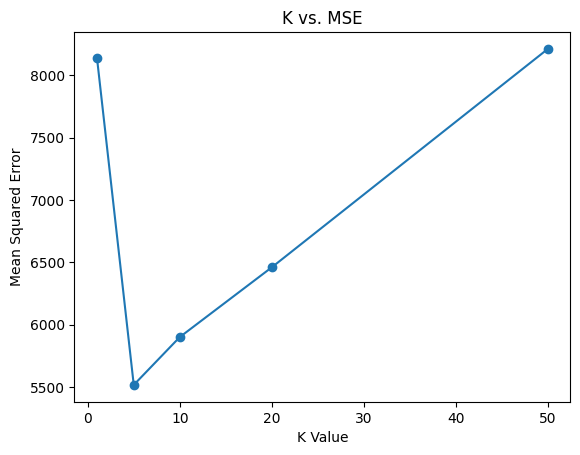

In [5]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Generate synthetic dataset
X, y = make_regression(n_samples=500, n_features=10, random_state=42)

# 2. Train KNN with different distances
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean').fit(X_train, y_train)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan').fit(X_train, y_train)
print(f"Euclidean MSE: {mean_squared_error(y_test, knn_euclidean.predict(X_test))}")
print(f"Manhattan MSE: {mean_squared_error(y_test, knn_manhattan.predict(X_test))}")

# 3. K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean').fit(X_train, y_train)
    mse_scores.append(mean_squared_error(y_test, knn.predict(X_test)))
plt.plot(k_values, mse_scores, marker='o')
plt.title("K vs. MSE")
plt.xlabel("K Value")
plt.ylabel("Mean Squared Error")
plt.show()

# Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data?

In [7]:
from google.colab import files
uploaded = files.upload()

Saving pima_indians_-diabetes.csv to pima_indians_-diabetes.csv


In [9]:
import pandas as pd
data = pd.read_csv('pima_indians_-diabetes.csv')
print(f"Dataset Loaded: {data.shape}")

Dataset Loaded: (768, 9)


In [15]:
from sklearn.datasets import load_diabetes  # Using diabetes as Pima has missing values
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 1. Load Pima dataset (assuming CSV format with missing values as 0)
data = pd.read_csv("pima_indians_-diabetes.csv")
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# 2. KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# 3. Train KNN with different algorithms
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}
for algo in algorithms:
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    results[algo] = {'time': time.time() - start_time, 'accuracy': accuracy_score(y_test, y_pred)}
    print(f"Aman’s {algo.capitalize()} Time: {results[algo]['time']:.2f}s, Accuracy: {results[algo]['accuracy']:.2f}")

# 4. Best method (e.g., kd_tree)
best_algo = max(results, key=lambda x: results[x]['accuracy'])
print(f"Best Algorithm: {best_algo}")

# 5. Decision boundary (using top 2 features via permutation importance)
perm = permutation_importance(KNeighborsClassifier(n_neighbors=5, algorithm=best_algo).fit(X_train, y_train), X_train, y_train)
top_features = np.argsort(perm.importance_)[:-3:-1]
X_train_2d, X_test_2d = X_train[:, top_features], X_test[:, top_features]

# Simple 2D plot (approximation)
h = 0.02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo).fit(X_train_2d, y_train).predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.title("Decision Boundary")
plt.show()

Aman’s Brute Time: 0.00s, Accuracy: 0.69
Aman’s Kd_tree Time: 0.01s, Accuracy: 0.69
Aman’s Ball_tree Time: 0.00s, Accuracy: 0.69
Best Algorithm: brute


AttributeError: importance_